# Project: NoShow Appointments Dataset Analysis

## 1. Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## 2. Introduction

In this project we will be analyzing the No-Show Appointments dataset. The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. A number of characteristics about the patient are included in each row and we need to find out the factors that are important in predicting whether a patient shows-up for the appointment or not. We seek answers to the following questions:

- Which gender is more committed to showing up for their appointments?
- Are older people more likely to miss/attend their appointments?
- If a patient recevies a reminder SMS, is she/he more likely to attend the apointment?
- Are handicapped patients more likey to miss their appointments?
- Does alochol problems affect patient attendance of their appointments?
- Does scholarship (social welfare membership status) affect patient no-show?


In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

<a id='wrangling'></a>
## 3. Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### 3.1. Load the dataset and check its general properties

In [373]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [374]:
#print dimensions of the dataset
df.shape

(110527, 14)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [376]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### The dataset has 110527 rows and 14 columns. The dataset does not contain null values. That is good. However, it looks like the two date fields are stored as strings so they will need to be transformed to datetime data type. All other fields look to have proper data types

### 3.2. Assess the dataset

In [377]:
# check for duplicate rows
sum(df.duplicated())

0

In [378]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [379]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [380]:
# Check summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [381]:
# Check for incorrect / illogical values of Age
df[df['Age'] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [382]:
# Check for negative values of Age
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### There are no duplicates, null values or NaN so we will not need to do any related cleaning. However there are 3539 rows with zero values for Age and one single row with a negative value for Age

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### 3.3. Data Cleaning
#### In this section we perform the necessary data cleaning steps and perform any required data tranformation so that the dataset is ready for EDA.

In [383]:
# Convert dates to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [384]:
# Create Day of week column.
import datetime
df['AppointmentDayOfWeek'] = df['AppointmentDay'].apply(lambda x: x.weekday())
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [385]:
# Rename columns to lowercase and insert _ to separate words
df.rename(columns = {'Gender': 'gender',
                    'ScheduledDay': 'scheduled_day',
                    'AppointmentDay': 'appointment_day',
                    'Age': 'age',
                    'Neighbourhood': 'neighbourhood',
                    'Scholarship': 'scholarship',
                    'Hipertension': 'hipertension',
                    'Diabetes': 'diabetes',
                    'Alcoholism': 'alcoholism',
                    'Handcap': 'handcap',
                    'SMS_received': 'sms_received',
                    'No-show': 'no_show',
                    'AppointmentDayOfWeek': 'appointment_day_of_week'}, inplace=True)

In [386]:
# drop PatientId and AppointmentID columns as we will not need them for our analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [387]:
#Convert No_show column to 1,0 for better analysis
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [388]:
# Create a column for the number of days between scheduling the appoointment and the appointment date
df['lead_days'] = df['appointment_day'].apply(lambda x: x.date) - df['scheduled_day'].apply(lambda x: x.date)
df['lead_days'] = df['lead_days'].apply(lambda x: x.days)

In [389]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day_of_week,lead_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,0


In [390]:
# Drop rows where Age is less than or equal zero
df.drop(df[df.age <= 0].index, inplace=True)

<a id='eda'></a>
## 4. Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 4.1. General Exploration

In [391]:
#create masks for easier retrival of needed rows according to No-Show status
noshow = df['no_show'] == 1
showed = df['no_show'] == 0

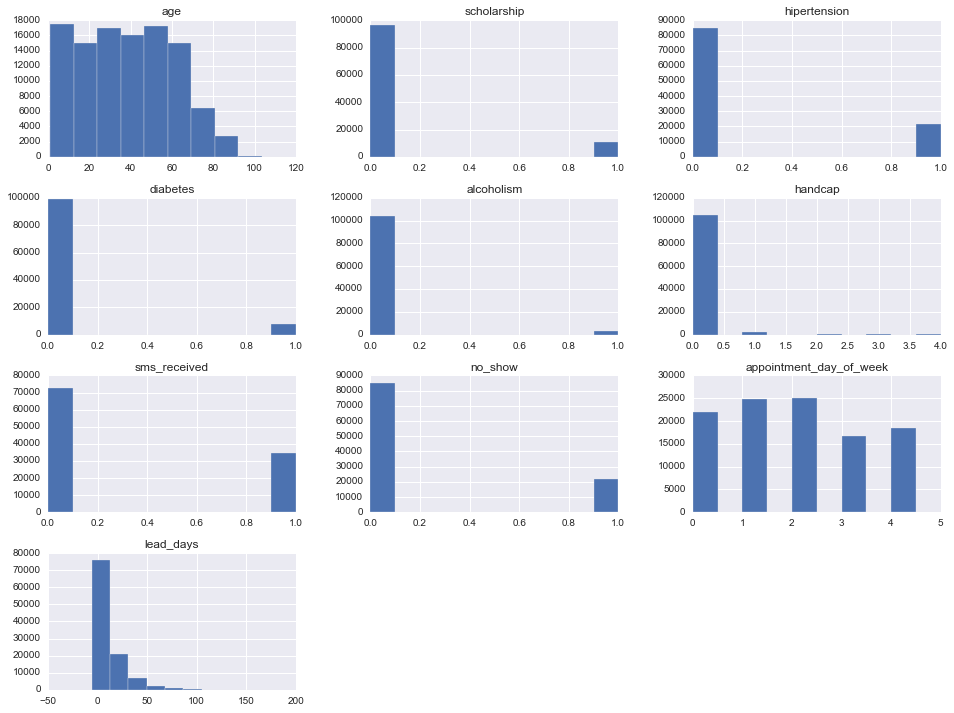

In [392]:
# Show distribution of attributes to get familiar with the data
df.hist(figsize=(16, 12));

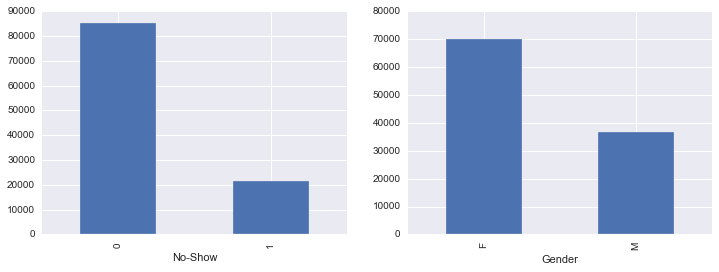

In [393]:
# check distribution of Gender and No-Show columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df['no_show'].value_counts().plot(kind='bar', ax=ax[0], xlabel='No-Show')
df['gender'].value_counts().plot(kind='bar', ax=ax[1], xlabel='Gender')

### 4.3. Which gender is more committed to showing up for their appointments?

In [394]:
group_counts = df.groupby('gender').no_show.value_counts()
group_counts

gender  no_show
F       0          55843
        1          14275
M       0          29464
        1           7405
Name: no_show, dtype: int64

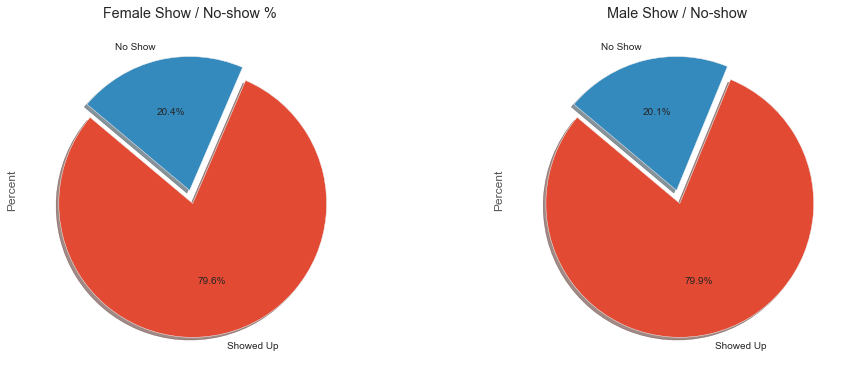

In [395]:
# Check no-show by gender
#print(plt.style.available)
plt.style.use('ggplot')
labels = ['Showed Up', 'No Show']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
group_counts['F'].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140, explode=(0.1, 0), 
                    labels=labels, title = 'Female Show / No-show %', ylabel='Percent', ax=ax[0]);
group_counts['M'].plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140, explode=(0.1, 0), 
                    labels=labels, title = 'Male Show / No-show', ylabel='Percent', ax=ax[1]);

### 4.2. Are older people more likely to miss/attend their appointments?

In [396]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.age[noshow].mean()

35.329151291512915

In [397]:
df.age[showed].mean()

39.07518726482

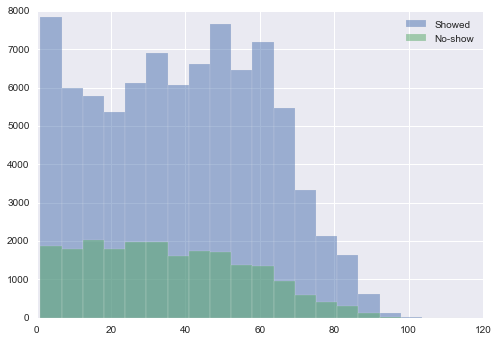

In [398]:
plt.style.use('seaborn')
df.age[showed].hist(alpha=0.5, bins=20, label='Showed')
df.age[noshow].hist(alpha=0.5, bins=20, label='No-show')
plt.legend();

#### From the pie chart above we can see that the proportion of males not showing for their appointments is almost equal to the proportion of females, so we can conclude that Gender alone is not a factor that determines no-show status.

### 4.4. What about other Boolean attributes?

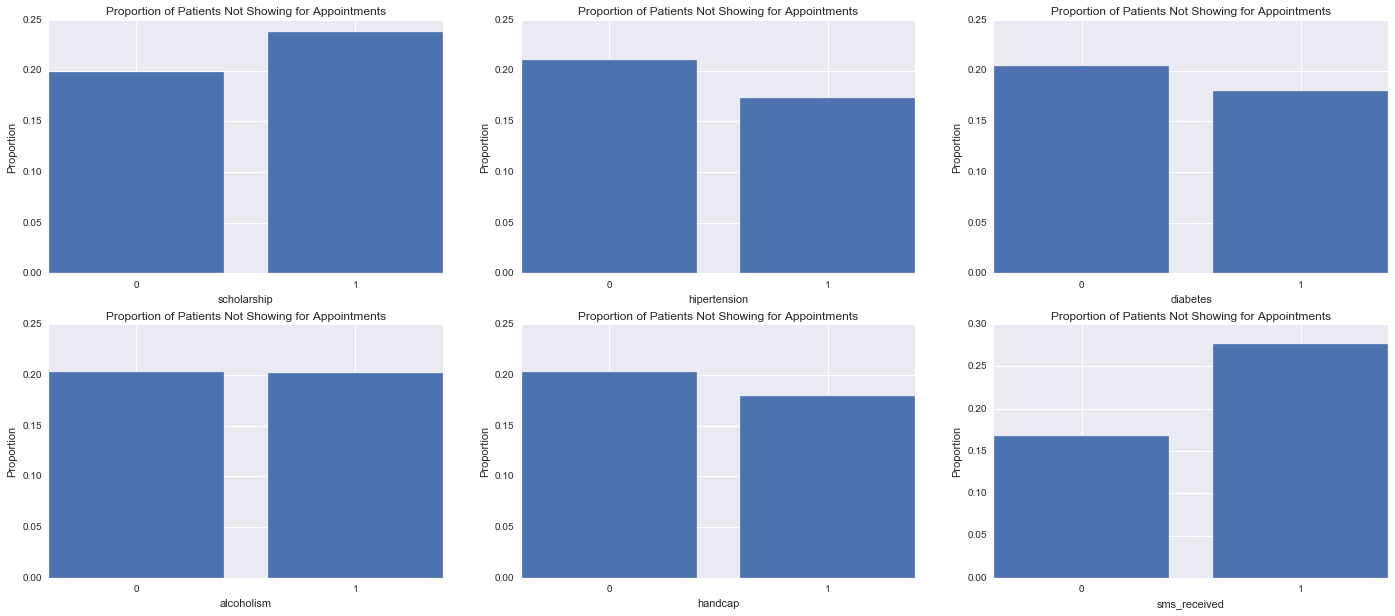

In [399]:
# Check No-show status for the six remaining attributes

attributes = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']

fig, ax = plt.subplots(2, 3, figsize=(24, 10))
i = j= 0
for att in attributes:
    group_counts = df.groupby(att).no_show.value_counts()
    group_counts

    prop__noshow_0 = group_counts[0][1] / group_counts[0].sum()
    prop__noshow_1 = group_counts[1][1] / group_counts[1].sum()

    ax[i, j].bar(["0", "1"], [prop__noshow_0, prop__noshow_1])
    ax[i, j].set_title("Proportion of Patients Not Showing for Appointments")
    ax[i, j].set_xlabel(att)
    ax[i, j].set_ylabel("Proportion");

    if(j==2):
        i=1
        j=0
    else:
        j+=1

### 4.5. Are No-Shows high for appointments on a certain day of the week?

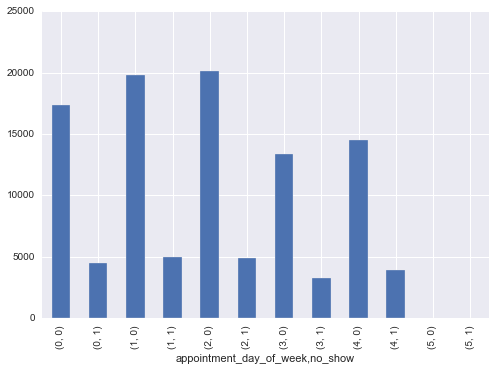

In [400]:
group_counts = df.groupby(['appointment_day_of_week']).no_show.value_counts()
group_counts.plot(kind='bar')

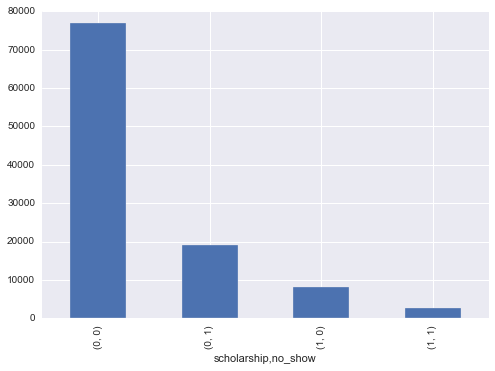

In [401]:
group_counts = df.groupby(['scholarship']).no_show.value_counts()
group_counts.plot(kind='bar')

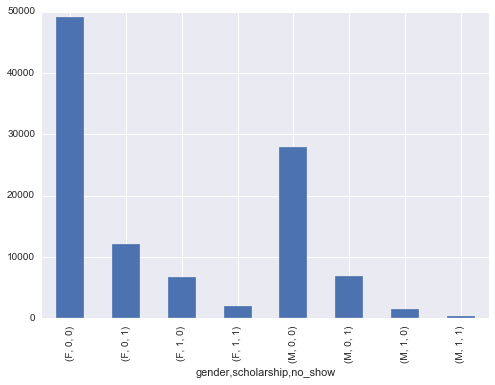

In [402]:
group_counts = df.groupby(['gender','scholarship']).no_show.value_counts()
group_counts.plot(kind='bar')

### 4.6 Same day appointments vs No-show

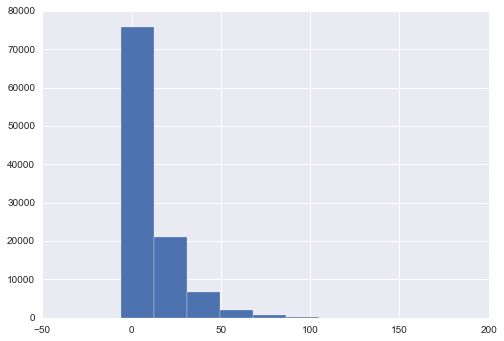

In [403]:
df['lead_days'].hist()

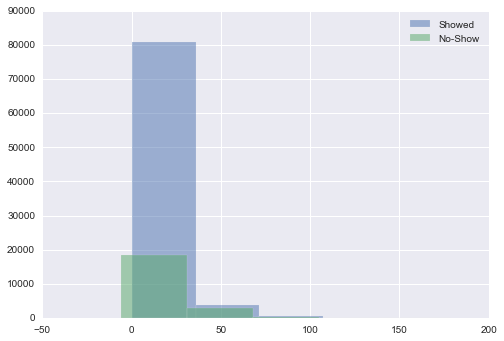

In [406]:
df.lead_days[showed].hist(alpha=0.5, bins=5, label='Showed')
df.lead_days[noshow].hist(alpha=0.5, bins=5, label='No-Show')
plt.legend()

<a id='conclusions'></a>
## 5. Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!